# Ranks of correct candidates 
Let's look at the rank of the correct candidate in the list of annotations.

In [17]:
import json
import random
import pandas as pd
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
import plotly.express as px
import re
import seaborn as sns
import math
from sklearn.preprocessing import MinMaxScaler

In [18]:
alligator_annotations_github_testset = "../Results/alligator_annotations_github-testset_babakAlessandro_02_Github_Testset.json"

In [19]:
with open(alligator_annotations_github_testset, 'r') as f:
    data = json.load(f)

In [20]:
## Find correct Qid for each row
correct_Qid = {row["idRow"]:row.get("ids", 'NIL') for row in data["rows"]}
rows = []

## For each annotation extract features and append binary value if the entity is correct
for annotation in data["semanticAnnotations"]["cea"]:
    for index, entity in enumerate(annotation["entity"]):
        is_correct = False
        # Check if the entity is correct
        if entity["id"] in correct_Qid[annotation["idRow"]]:
            is_correct = True

        id_row = annotation.get('idRow')
        id_column = annotation.get('idColumn')

        # Generate the key in the format "{idRow}-{idColumn}"
        key = f"{id_row}-{id_column}-{index}"

        # Extract features as a dictionary
        features = {feature['id']: feature['value'] for feature in entity.get('features', [])}
        features['key'] = key  # Include the custom key in the DataFrame
        features['is_correct'] = is_correct
        features['idRow'] = id_row
        features['idColumn'] = id_column
        features['index'] = index

        # Append the features dictionary to rows
        rows.append(features)

# Create DataFrame and set 'key' as index
candidate_features = pd.DataFrame(rows).set_index('key')

# sort by column name
candidate_features_sub = candidate_features.drop(columns=['idRow', 'idColumn', 'index', 'is_correct'])
candidate_features_sub.sort_index(inplace=True, axis=1)
candidate_features_sub[['idRow', 'idColumn', 'index', 'is_correct']] = candidate_features[['idRow', 'idColumn', 'index', 'is_correct']]
candidate_features = candidate_features_sub

candidate_features_preprocessed = candidate_features.copy()

In [21]:
# remove duplicates
candidate_features_preprocessed = candidate_features.drop_duplicates(subset=candidate_features.columns.difference(['idColumn', 'index']))

In [24]:
non_nil_rows = candidate_features_preprocessed[candidate_features_preprocessed['idRow'] > 462 ].sort_values(by=['idRow', 'index'])
non_nil_rows = non_nil_rows[['idRow', 'index', 'is_correct']]
non_nil_rows

,idRow,index,is_correct
key,,,
463-0-0,463,0,False
463-0-2,463,2,True
463-0-3,463,3,False
463-0-4,463,4,False
463-0-5,463,5,False
...,...,...,...
916-0-20,916,20,False
916-0-21,916,21,False
916-0-22,916,22,False


In [25]:
correct_candidates_non_nil_rows = non_nil_rows[non_nil_rows['is_correct'] == True]
correct_candidates_non_nil_rows

,idRow,index,is_correct
key,,,
463-0-2,463,2,True
464-0-21,464,21,True
465-0-12,465,12,True
466-0-0,466,0,True
467-0-22,467,22,True
...,...,...,...
912-0-39,912,39,True
913-0-47,913,47,True
914-0-42,914,42,True


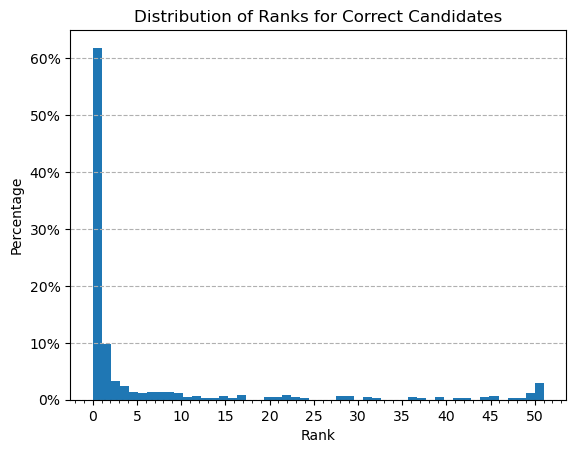

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, PercentFormatter

# Histogram of index column for correct candidates
plt.hist(
    correct_candidates_non_nil_rows['index'], 
    bins=50, 
    weights=np.ones(len(correct_candidates_non_nil_rows['index'])) / len(correct_candidates_non_nil_rows['index'])
)

# Set title and labels
plt.title('Distribution of Ranks for Correct Candidates')
plt.xlabel('Rank')
plt.ylabel('Percentage')

# Add major ticks with labels at multiples of 5
max_index = max(correct_candidates_non_nil_rows['index'])
plt.xticks(np.arange(0, max_index + 1, 5))

# Add minor ticks for all natural numbers
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Add gridlines
plt.grid(axis='y', linestyle='--')

# Show plot
plt.show()


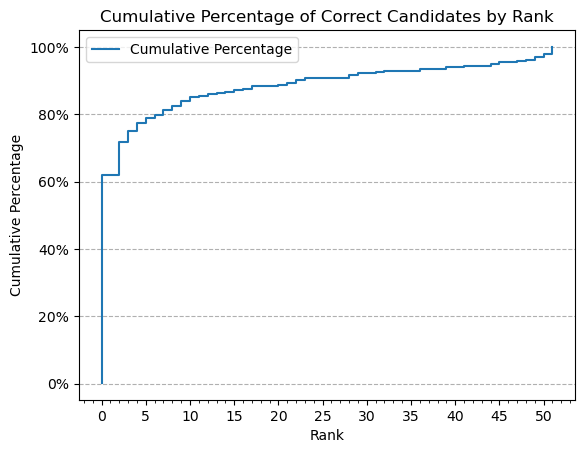

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, PercentFormatter

# Sort the 'index' column for cumulative calculation
sorted_indices = np.sort(correct_candidates_non_nil_rows['index'])

# Calculate cumulative percentages
cumulative_percentages = np.arange(1, len(sorted_indices) + 1) / len(sorted_indices)

# Plot cumulative line chart
plt.plot(sorted_indices, cumulative_percentages, drawstyle='steps-post', label='Cumulative Percentage')

# Set title and labels
plt.title('Cumulative Percentage of Correct Candidates by Rank')
plt.xlabel('Rank')
plt.ylabel('Cumulative Percentage')

# Add major ticks with labels at multiples of 5
max_index = max(correct_candidates_non_nil_rows['index'])
plt.xticks(np.arange(0, max_index + 1, 5))

# Add minor ticks for all natural numbers
plt.gca().xaxis.set_minor_locator(MultipleLocator(1))

# Format y-axis as percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

# Add gridlines and legend
plt.grid(axis='y', linestyle='--')
plt.legend()

# Show plot
plt.show()


In [37]:
cumulative_percentage_at_5 = cumulative_percentages[np.searchsorted(sorted_indices, 5, side='right') - 1]
print(f"Cumulative percentage for rank 5: {cumulative_percentage_at_5 * 100:.2f}%")


Cumulative percentage for rank 5: 78.79%
